/home/puechua/anaconda3/envs/olaS1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/home/puechua/anaconda3/envs/olaS1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/home/puechua/anaconda3/envs/olaS1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



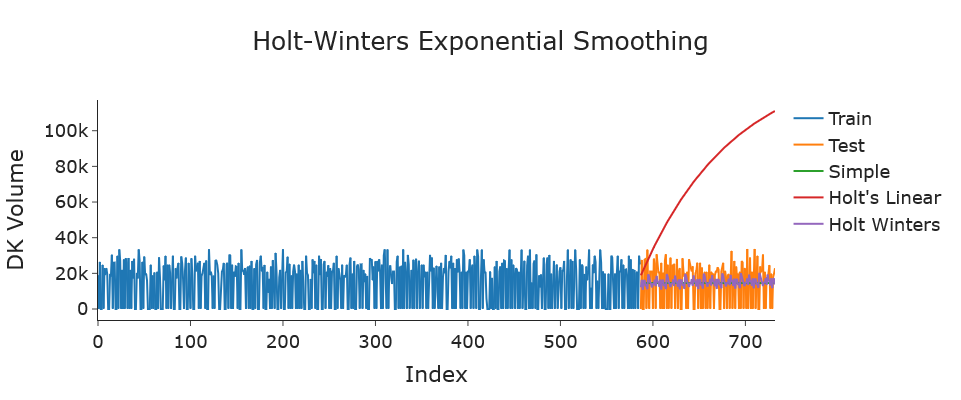

In [2]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Read in the data
data = pd.read_csv('station1_new(1).csv')  # Update with your file path


# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]


def plot_func(forecast1, forecast2, forecast3, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['DK'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['DK'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast1, name='Simple'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast2, name="Holt's Linear"))
    fig.add_trace(go.Scatter(x=test.index, y=forecast3, name='Holt Winters'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Index',
                      yaxis_title='DK Volume')
    return fig.show()


# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['DK']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

# Fit Holt's model and get forecasts
model_holt = Holt(train['DK'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))

# Fit Holt Winters model and get forecasts
model_holt_winters = ExponentialSmoothing(train['DK'], trend='add',
                                          seasonal='add', seasonal_periods=20).fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(len(test)+100)

# Plot the forecasts
plot_func(forecasts_simple, forecasts_holt, forecasts_holt_winters, "Holt-Winters Exponential Smoothing")